Initializing Data

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import seaborn as sns
import scipy

np.set_printoptions(linewidth=np.inf,threshold=np.inf)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA


In [123]:
data_dir = '/Users/christian fink/Math485/Math485_2/voice_clip_selected/'
voice_clip_meta_data = pd.read_csv(data_dir+"voice_clip_meta_data.csv")
voice_feature = pd.read_csv(data_dir+"voice_feature_20241022.csv")
age_name = ['teens', 'twenties','thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties','nineties']
age_value = range(1,10)
age_dict = dict(zip(age_name, age_value))
gender_name = ["male_masculine","female_feminine"]
gender_value = [0,1]
gender_dict = dict(zip(gender_name, gender_value))
voice_feature['age'] = voice_feature['age'].map(age_dict)
voice_feature['gender'] = voice_feature['gender'].map(gender_dict)

In [124]:
col_list_mfcc = ['mfcc_00', 'mfcc_01', 'mfcc_02', 'mfcc_03', 'mfcc_04', 'mfcc_05',
       'mfcc_06', 'mfcc_07', 'mfcc_08', 'mfcc_09', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17',
       'mfcc_18', 'mfcc_19', 'mfcc_20', 'mfcc_21', 'mfcc_22', 'mfcc_23',
       'mfcc_24']
col_list_f0 = ['f0_mean', 'f0_std','f0_var','f0_min','f0_max','f0_skew', 'f0_kurtosis']
col_list_zcr = ['zcr_mean','zcr_std','zcr_var','zcr_min','zcr_max','zcr_skew','zcr_kurtosis']
X = voice_feature[col_list_f0 + col_list_mfcc+col_list_zcr]
feature_names = col_list_f0 + col_list_mfcc+col_list_zcr
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
y = voice_feature.gender

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=1)

Elbow Finding

In [125]:
def find_elbow(df, colnames, clusters_range):
    df_for_cluster = df.loc[:, colnames]  
    df_for_cluster = df_for_cluster.dropna()
    stscaler = StandardScaler().fit(df_for_cluster)
    normalized_df = stscaler.transform(df_for_cluster)

    inertias = [] # wcss: Within Cluster Sum of Squares
    for k in clusters_range:
        kmeans = KMeans(init='k-means++',n_clusters=k,n_init=100, max_iter=300, random_state=0).fit(normalized_df)
        inertias.append(kmeans.inertia_)
    plt.figure()
    plt.plot(clusters_range,inertias, marker='o')
    plt.title('Elbow method for deciding on k')
    plt.xlabel('Number of clusters: k')
    plt.ylabel('inertia')
    plt.show()
    return

def run_kmeans(df, colnames, k):
    df_for_cluster = df.loc[:,colnames]
    stscaler = StandardScaler().fit(df_for_cluster)
    normalized_df = stscaler.transform(df_for_cluster)

    kmeans = KMeans(init='k-means++',n_clusters=k,n_init=100, max_iter=300, random_state=0).fit(normalized_df)
    df['cluster'] = kmeans.labels_
    return df

F0 Clustering

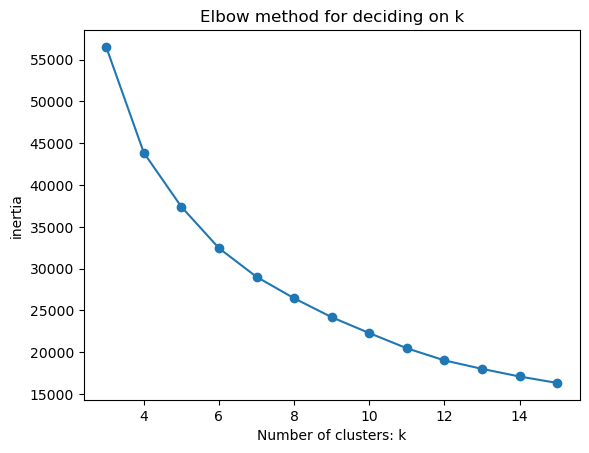

In [126]:
df =  voice_feature
colnames = ['f0_mean', 'f0_std','f0_var','f0_min','f0_max','f0_skew', 'f0_kurtosis']
clusters_range = [3,4,5,6,7,8,9,10,11,12,13,14,15]
find_elbow(df,colnames,clusters_range)

ZCR Clustering

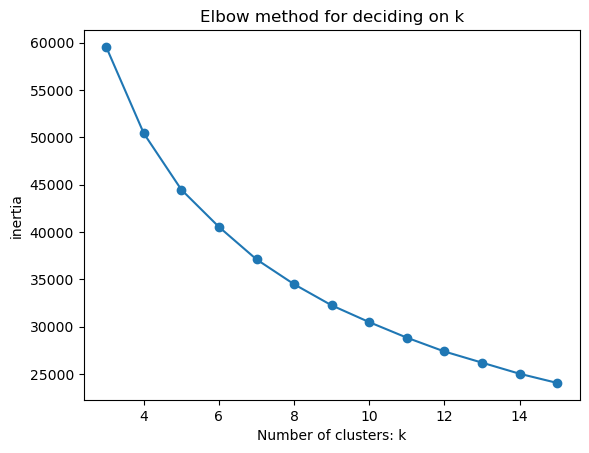

In [127]:
df =  voice_feature
colnames = ['zcr_mean','zcr_std','zcr_var','zcr_min','zcr_max','zcr_skew','zcr_kurtosis']
clusters_range = [3,4,5,6,7,8,9,10,11,12,13,14,15]
find_elbow(df,colnames,clusters_range)

MFCC Clustering

In [128]:
df =  voice_feature
colnames = ['mfcc_00', 'mfcc_01', 'mfcc_02', 'mfcc_03', 'mfcc_04', 'mfcc_05',
       'mfcc_06', 'mfcc_07', 'mfcc_08', 'mfcc_09', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17',
       'mfcc_18', 'mfcc_19', 'mfcc_20', 'mfcc_21', 'mfcc_22', 'mfcc_23',
       'mfcc_24']
clusters_range = [3,4,5,6,7,8,9,10,11,12,13,14,15]
find_elbow(df,colnames,clusters_range)

RAN TOO LONG SO HAD TO TURN TO SHELL TO AVOID RUINING COMPUTER

SyntaxError: invalid syntax (2223692558.py, line 10)

Trying Different Methods

RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(criterion= "entropy", random_state=0,max_depth=4)
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
cv_score = cross_val_score(clf, X_train, y_train, cv=10)
score, cv_score

(0.9211242067089755,
 array([0.91339286, 0.92946429, 0.90803571, 0.93125   , 0.93660714, 0.92225201, 0.90616622, 0.92761394, 0.91420912, 0.93029491]))

<Figure size 1000x500 with 0 Axes>

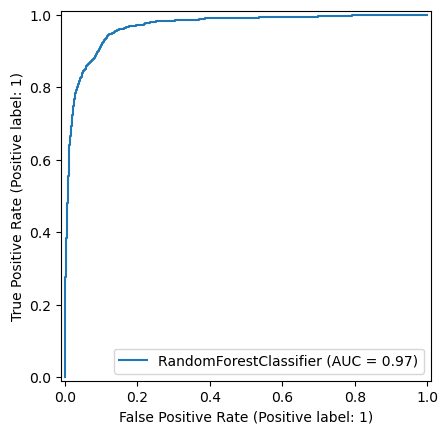

In [ ]:
plt.figure(figsize= (10, 5))
metrics.RocCurveDisplay.from_estimator(
   clf, X_test, y_test)

RidgeClassifier

In [ ]:
clf = HistGradientBoostingClassifier(random_state=0,max_iter=4)
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
cv_score = cross_val_score(clf, X_train, y_train, cv=10)
score, cv_score

(0.8699909338168631,
 array([0.84821429, 0.87321429, 0.87589286, 0.86517857, 0.90178571, 0.86237712, 0.87935657, 0.85612154, 0.87310098, 0.84807864]))

<Figure size 1000x500 with 0 Axes>

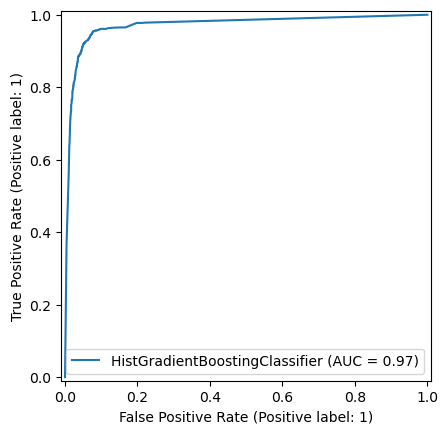

In [ ]:
plt.figure(figsize= (10, 5))
metrics.RocCurveDisplay.from_estimator(
   clf, X_test, y_test)

DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion= "entropy", random_state=0,max_depth=4)
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
cv_score = cross_val_score(clf, X_train, y_train, cv=10)
score, cv_score

(0.9227561196736174,
 array([0.925     , 0.91517857, 0.92053571, 0.93214286, 0.92857143, 0.91867739, 0.91331546, 0.92314567, 0.92582663, 0.91152815]))

<Figure size 1000x500 with 0 Axes>

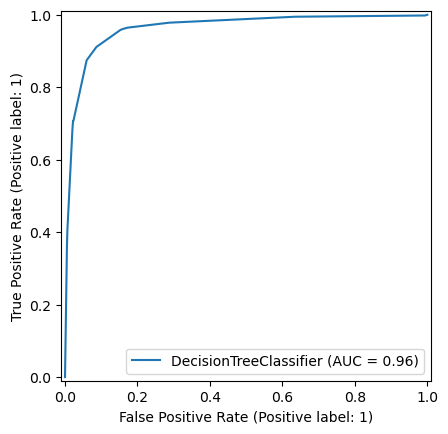

In [ ]:
plt.figure(figsize= (10, 5))
metrics.RocCurveDisplay.from_estimator(
   clf, X_test, y_test)

Playing with Data Accuracy

In [ ]:
X = voice_feature[col_list_f0]
feature_names = col_list_f0
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
y = voice_feature.gender

DecisionTreeClassifier with just f0

In [ ]:
clf = DecisionTreeClassifier(criterion= "entropy", random_state=0,max_depth=4)
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
cv_score = cross_val_score(clf, X_train, y_train, cv=10)
score, cv_score

(0.9227561196736174,
 array([0.925     , 0.91517857, 0.92053571, 0.93214286, 0.92857143, 0.91867739, 0.91331546, 0.92314567, 0.92582663, 0.91152815]))

<Figure size 1000x500 with 0 Axes>

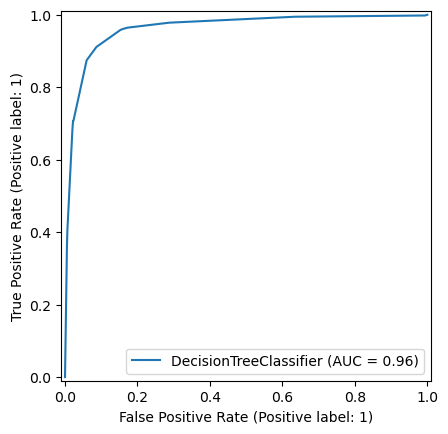

In [ ]:
plt.figure(figsize= (10, 5))
metrics.RocCurveDisplay.from_estimator(
   clf, X_test, y_test)